In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
#upload the json file 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeeva86103","key":"39f3675abf2f8a710c1804566e79c020"}'}

In [3]:
#make directory for kaggle
!mkdir ~/.kaggle


In [4]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [5]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#to list all datasets in the kaggle
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          25188        702  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1771         45  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1533         38  1.0              
fatihb/coffee-quality-data-cqi

In [7]:
#download the dataset using api command
! kaggle datasets download -d akash2907/bird-species-classification

100% 1.37G/1.37G [01:01<00:00, 25.5MB/s]
100% 1.37G/1.37G [01:01<00:00, 24.0MB/s]


In [8]:
!unzip /content/bird-species-classification.zip

Archive:  /content/bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: t

In [9]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen=ImageDataGenerator(rescale=(1./255)) #rescale-->normalisation only

In [11]:
train=train_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)
test=test_gen.flow_from_directory('/content/test_data/test_data',
                                  target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [12]:
train.class_indices,test.class_indices

({'blasti': 0,
  'bonegl': 1,
  'brhkyt': 2,
  'cbrtsh': 3,
  'cmnmyn': 4,
  'gretit': 5,
  'hilpig': 6,
  'himbul': 7,
  'himgri': 8,
  'hsparo': 9,
  'indvul': 10,
  'jglowl': 11,
  'lbicrw': 12,
  'mgprob': 13,
  'rebimg': 14,
  'wcrsrt': 15},
 {'blasti': 0,
  'bonegl': 1,
  'brhkyt': 2,
  'cbrtsh': 3,
  'cmnmyn': 4,
  'gretit': 5,
  'hilpig': 6,
  'himbul': 7,
  'himgri': 8,
  'hsparo': 9,
  'indvul': 10,
  'jglowl': 11,
  'lbicrw': 12,
  'mgprob': 13,
  'rebimg': 14,
  'wcrsrt': 15})

In [13]:
#build the cnn model
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [14]:
model=Sequential()
#convolution layer
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3))) #3-->color image.1-->grayscale
#max_pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flattened layer
model.add(Flatten())
#fully connected(ANN)
model.add(Dense(45,activation='relu')) #1st hidden layer
model.add(Dense(16,activation='softmax')) #output layer 16--> 16classes only

In [15]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#train the model
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 97s 5s/step - loss: 5.0330 - accuracy: 0.0867 - val_loss: 2.8170 - val_accuracy: 0.0573
Epoch 2/10
19/19 [==============================] - 86s 5s/step - loss: 2.5980 - accuracy: 0.1933 - val_loss: 2.6934 - val_accuracy: 0.1019
Epoch 3/10
19/19 [==============================] - 86s 5s/step - loss: 2.3311 - accuracy: 0.2867 - val_loss: 2.6474 - val_accuracy: 0.1529
Epoch 4/10
19/19 [==============================] - 85s 5s/step - loss: 2.1130 - accuracy: 0.3333 - val_loss: 2.6929 - val_accuracy: 0.1401
Epoch 5/10
19/19 [==============================] - 85s 5s/step - loss: 2.0112 - accuracy: 0.4067 - val_loss: 2.5728 - val_accuracy: 0.1720
Epoch 6/10
19/19 [==============================] - 85s 5s/step - loss: 1.6907 - accuracy: 0.4733 - val_loss: 2.6238 - val_accuracy: 0.1975
Epoch 7/10
19/19 [==============================] - 86s 5s/step - loss: 1.4971 - accuracy: 0.5667 - val_loss: 2.7602 - val_accuracy: 0.1911
Epoch 8/10
19/19 [==

In [17]:
model.save('birdspecies') #it will save the model in the local system

In [18]:
#predict the model with real time image rat
import numpy as np
from tensorflow.keras.preprocessing import image

In [19]:
img=image.load_img('/content/predictbird.jpg',target_size=(120,120))

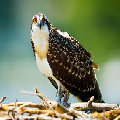

In [20]:
img

In [21]:
#convert the image to array
img=image.img_to_array(img)
img

array([[[ 26.,  61.,  57.],
        [ 26.,  61.,  57.],
        [ 26.,  61.,  57.],
        ...,
        [ 52.,  78.,   5.],
        [ 51.,  77.,   4.],
        [ 51.,  77.,   4.]],

       [[ 27.,  62.,  58.],
        [ 27.,  62.,  58.],
        [ 27.,  62.,  58.],
        ...,
        [ 52.,  78.,   5.],
        [ 51.,  77.,   4.],
        [ 51.,  77.,   4.]],

       [[ 27.,  63.,  59.],
        [ 27.,  63.,  59.],
        [ 27.,  63.,  59.],
        ...,
        [ 52.,  78.,   7.],
        [ 51.,  77.,   6.],
        [ 51.,  77.,   6.]],

       ...,

       [[250., 232., 220.],
        [223., 211., 199.],
        [243., 236., 226.],
        ...,
        [224., 200., 152.],
        [226., 198., 151.],
        [227., 196., 149.]],

       [[255., 248., 237.],
        [252., 242., 232.],
        [253., 249., 238.],
        ...,
        [243., 220., 176.],
        [159., 135.,  89.],
        [106.,  79.,  34.]],

       [[250., 242., 229.],
        [254., 250., 238.],
        [241., 2

In [22]:
#expand the dimension from 2 to 3 because we use 3 channel rgb for tha model
img=np.expand_dims(img,axis=0)
img

array([[[[ 26.,  61.,  57.],
         [ 26.,  61.,  57.],
         [ 26.,  61.,  57.],
         ...,
         [ 52.,  78.,   5.],
         [ 51.,  77.,   4.],
         [ 51.,  77.,   4.]],

        [[ 27.,  62.,  58.],
         [ 27.,  62.,  58.],
         [ 27.,  62.,  58.],
         ...,
         [ 52.,  78.,   5.],
         [ 51.,  77.,   4.],
         [ 51.,  77.,   4.]],

        [[ 27.,  63.,  59.],
         [ 27.,  63.,  59.],
         [ 27.,  63.,  59.],
         ...,
         [ 52.,  78.,   7.],
         [ 51.,  77.,   6.],
         [ 51.,  77.,   6.]],

        ...,

        [[250., 232., 220.],
         [223., 211., 199.],
         [243., 236., 226.],
         ...,
         [224., 200., 152.],
         [226., 198., 151.],
         [227., 196., 149.]],

        [[255., 248., 237.],
         [252., 242., 232.],
         [253., 249., 238.],
         ...,
         [243., 220., 176.],
         [159., 135.,  89.],
         [106.,  79.,  34.]],

        [[250., 242., 229.],
       

In [23]:
model.predict(img) #predict the model 

1/1 [==============================] - 0s 138ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [24]:
pred=np.argmax(model.predict(img))
out=['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
out[pred]

1/1 [==============================] - 0s 20ms/step


'gretit'